In [1]:
# load modules
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib.pylab as plt
import numpy as np
from pysz import pysz

In [2]:
# initialize tsz_cl class
tsz = pysz.tsz_cl()

# tSZ $C_{\ell}$ calculation

In [3]:
# set parameters
pars = {'h0':0.7, 'obh2':0.025,'och2':0.12,\
        'As':np.exp(3.06)*1e-10,'ns':0.9645,'mnu':0.06,\
        'flag_nu':True, 'flag_tll':False, 'mass_bias':1.5}

# array of multipoles
ell_arr = np.logspace(1,4.0,20)

# calculate b_Y and dY/dz
cl_yy, tll = tsz.get_tsz_cl(ell_arr,pars)

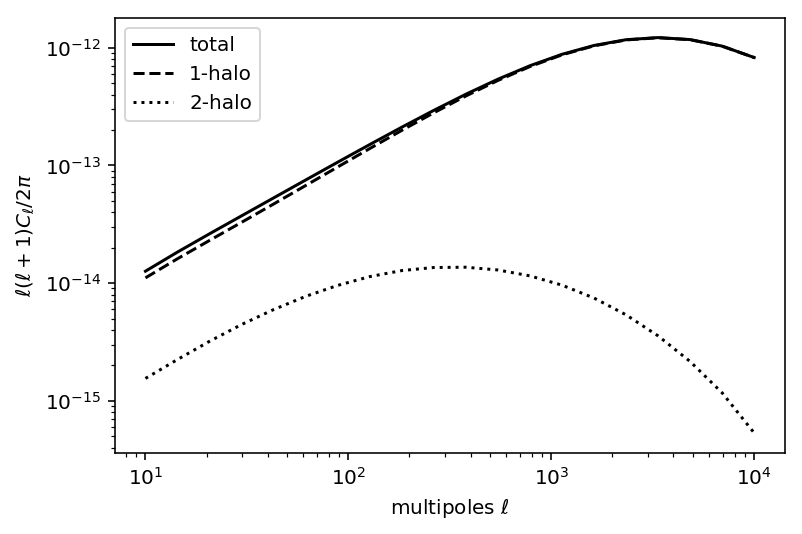

In [4]:
factor = ell_arr*(ell_arr+1)/np.pi
plt.loglog(ell_arr,(cl_yy[0]+cl_yy[1])*factor,'k-',label='total')
plt.loglog(ell_arr,(cl_yy[0])*factor,'k--',label='1-halo')
plt.loglog(ell_arr,(cl_yy[1])*factor,'k:',label='2-halo')
plt.xlabel(r'multipoles $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_{\ell}/2\pi$')
plt.legend()

# b_Y and dY/dz calculation

In [5]:
# %%timeit
# set parameters
pars = {'h0':0.7, 'obh2':0.025,'och2':0.12,\
        'As':np.exp(3.06)*1e-10,'ns':0.9645,'mnu':0.06,\
        'flag_nu':True, 'mass_bias':1.5}

# array of redshifts at which b_Y and dY/dz calculated
zarr = np.logspace(np.log10(1e-2),np.log10(4.),100)

# calculate b_Y and dY/dz
by, dydz = tsz.get_by_dydz(zarr,pars)

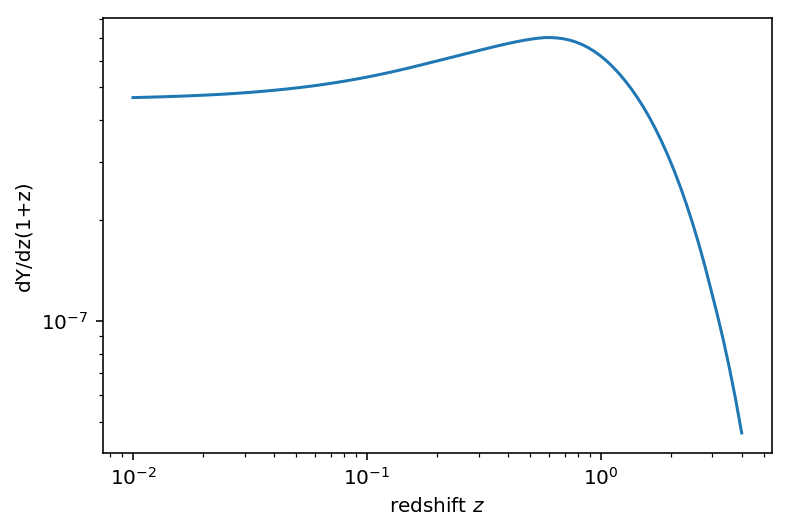

In [6]:
plt.loglog(zarr,dydz*(1+zarr))
plt.xlabel(r'redshift $z$')
plt.ylabel(r'dY/dz(1+z)')

In [7]:
# %%timeit
# set parameters
pars = {'h0':0.7, 'obh2':0.025,'och2':0.12,\
        'As':np.exp(3.06)*1e-10,'ns':0.9645,'mnu':0.06,\
        'flag_nu':True, 'mass_bias':1.5}

z = 1.0
Mh = 1e15 # in Msun/h

# calculate dy/dz/dlogMh
dydzdMh = tsz.get_dydzdlogMh(z,Mh,pars)